# Определение перспективного тарифа для телеком компании

## Шаг 1. Изучение общей информации

In [1]:
from scipy import stats as st
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
from functools import partial
from IPython.display import display

In [2]:
pd.set_option('display.max_columns', None)
#warnings.simplefilter('ignore')

### Изучение общей информации таблицы клиентов

In [3]:
users = pd.read_csv('datasets/users.csv')
users.name = 'users'
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

Пропуски есть в колонке с датой прекращения тарифа. Колонки с датами подключения и отлючения нужно преобразовать к типу datetime. Названия колонок корректные.

### Изучение общей информации таблицы звонков

In [6]:
calls = pd.read_csv('datasets/calls.csv')
calls.name = 'calls'
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [8]:
calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

Пропуски отсутствуют. Колонку с датой звонка нужно преобразовать к типу datetime. Названия колонок корректные.

### Изучение общей информации таблицы сообщений

In [9]:
messages = pd.read_csv('datasets/messages.csv')
messages.name = 'messages'
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

Пропуски отсутствуют. Колонку с датой сообщения нужно преобразовать к типу datetime. Названия колонок корректные.

### Изучение общей информации таблицы интернета

In [12]:
internet = pd.read_csv('datasets/internet.csv')
internet.name = 'internet'
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [14]:
internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

Пропуски отсутствуют. Колонку с датой сессии нужно преобразовать к типу datetime. Названия колонок корректные.

### Изучение общей информации таблицы тарифов

In [15]:
tariffs = pd.read_csv('datasets/tariffs.csv')
tariffs.name = 'tariffs'
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

Пропуски отсутствуют. Названия колонок корректные, кроме колонки mg_per_month_included, префикс которой должен быть "mb".

In [18]:
tariffs.rename(columns={'mg_per_month_included': 'mb_per_month_included'}, inplace=True)

### Вывод

Данные содержат пропуски в единственой колонке с датой прекращания действия тарифа. Типы данных нужно оптимизировать: даты в четырех таблицах из строки преобразовать в datetime. Название одной колонки исправлено.

## Шаг 2. Подготовка данных

### Приведение данных к нужному типу

Преобразуем колонки с датами в datetime:

In [19]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
calls['call_date'] = pd.to_datetime(calls['call_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
for table in [users, calls, messages, internet]:
    print(table.info(), '\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  floa

### Нахождение и исправление ошибок в данных

Найдем и удалим дубли во всех таблицах.

In [20]:
for table in [users, calls, messages, internet, tariffs]:
    duplicates = table.duplicated().sum()
    if duplicates > 0:
        print(f'Найдены дубли в таблице {table.name} в количестве {duplicates}')
        table = table.drop_duplicates().reset_index(drop=True)
        print('Дубли удалены, осталось дублей', table.duplicated().sum())
    else:
        print(f'Дубли в таблице {table.name} не найдены')

Дубли в таблице users не найдены
Дубли в таблице calls не найдены
Дубли в таблице messages не найдены
Дубли в таблице internet не найдены
Дубли в таблице tariffs не найдены


#### Ошибки в таблице клиентов

In [21]:
for column in users.columns:
    print(users[column].describe(), '\n')

count     500.000000
mean     1249.500000
std       144.481833
min      1000.000000
25%      1124.750000
50%      1249.500000
75%      1374.250000
max      1499.000000
Name: user_id, dtype: float64 

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64 

count                      38
unique                     33
top       2018-10-03 00:00:00
freq                        2
first     2018-08-17 00:00:00
last      2018-12-30 00:00:00
Name: churn_date, dtype: object 

count        500
unique        76
top       Москва
freq          99
Name: city, dtype: object 

count       500
unique      246
top       Радим
freq          6
Name: first_name, dtype: object 

count           500
unique          419
top       Андреенко
freq              5
Name: last_name, dtype: object 

count                     500
unique                    270
top       2018-05-28 00:00:00
freq     

Заполним пропуски в колонке с датой отключения тарифа для удобства дальнейшей работы последним днем текущего года:

In [22]:
users.loc[users['churn_date'].isna(), 'churn_date'] = '2018-12-31'
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  500 non-null    datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Проверим, не опережают ли даты отключения даты подключения:

In [23]:
def wrong_dates(row):
    churn_date = row['churn_date']
    reg_date = row['reg_date']
    if reg_date > churn_date:
        return True
    return False

users['wrong_dates'] = users.apply(wrong_dates, axis=1)
if len(users.query('wrong_dates == True')) == 0:
    print('Даты корректны: даты отключения позже дат подключения')
else:
    print('Даты не корректны: даты отключения раньше дат подключения')
users.drop(labels=['wrong_dates'], axis=1, inplace=True) 

Даты корректны: даты отключения позже дат подключения


Приведем к нижнему регистру текстовые колонки, чтобы избежать возможных сложностей из-за регистра:

In [24]:
for column in ['city', 'first_name', 'last_name']:
    print('Уникальные значения колонки', column, 'до преобразования к нижнему регистру', len(users[column].unique()))
    users[column] = users[column].str.lower()
    print('Уникальные значения колонки', column, 'после преобразования к нижнему регистру', len(users[column].unique()))

Уникальные значения колонки city до преобразования к нижнему регистру 76
Уникальные значения колонки city после преобразования к нижнему регистру 76
Уникальные значения колонки first_name до преобразования к нижнему регистру 246
Уникальные значения колонки first_name после преобразования к нижнему регистру 246
Уникальные значения колонки last_name до преобразования к нижнему регистру 419
Уникальные значения колонки last_name после преобразования к нижнему регистру 419


Проблем с регистром не было. И не будет.

#### Ошибки в таблице звонков

In [25]:
for column in calls.columns:
    print(calls[column].describe(), '\n')

count      202607
unique     202607
top       1416_30
freq            1
Name: id, dtype: object 

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object 

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64 

count    202607.000000
mean       1253.940619
std         144.722751
min        1000.000000
25%        1126.000000
50%        1260.000000
75%        1379.000000
max        1499.000000
Name: user_id, dtype: float64 



In [26]:
calls.query('duration == 0').shape[0]

39613

Присутствует множество записей о звонках длительностью ноль. Так как провайдер округляет длительность звонков до одной минуты вверх, то целесообразно то же самое сделать в таблице, заменив нулевые звонки на минутную длительность и дробные значения целыми:

In [27]:
calls['duration'] = calls['duration'].apply(lambda x: 1 if x == 0 else x)
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int32         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


#### Ошибки в таблице сообщений

In [28]:
for column in messages.columns:
    print(messages[column].describe(), '\n')

count      123036
unique     123036
top       1174_99
freq            1
Name: id, dtype: object 

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object 

count    123036.000000
mean       1256.989410
std         143.523967
min        1000.000000
25%        1134.000000
50%        1271.000000
75%        1381.000000
max        1499.000000
Name: user_id, dtype: float64 



Ошибки в таблице сообщений не найдены.

#### Ошибки в таблице интернета

In [29]:
for column in internet.columns:
    print(internet[column].describe(), '\n')

count    149396.000000
mean      74697.500000
std       43127.054745
min           0.000000
25%       37348.750000
50%       74697.500000
75%      112046.250000
max      149395.000000
Name: Unnamed: 0, dtype: float64 

count      149396
unique     149396
top       1174_99
freq            1
Name: id, dtype: object 

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64 

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object 

count    149396.000000
mean       1252.099842
std         144.050823
min        1000.000000
25%        1130.000000
50%        1251.000000
75%        1380.000000
max        1499.000000
Name: user_id, dtype: float64 



In [30]:
internet.query('mb_used == 0').shape[0]

19598

Присутствует множество записей о сессиях интернета размером ноль. Так как провайдер округляет объем трафика до одного мегабайта вверх, то целесообразно то же самое сделать в таблице, заменив нулевые сессии на 1 мегабайт и дробные значения целыми:

In [31]:
internet['mb_used'] = internet['mb_used'].apply(lambda x: 1 if x == 0 else x)
internet['mb_used'] = np.ceil(internet['mb_used'])
internet['mb_used'] = internet['mb_used'].astype('int')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  int32         
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(2), object(1)
memory usage: 5.1+ MB


#### Ошибки в таблице тарифов

In [32]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Невооруженным глазом видно отсутствие ошибок. ))

### Подсчеты для каждого пользователя

Клиенты подключаются и отключаются в любые дни месяца. Значит, нужно рассчитывать плату за фактически использованные дни неполных месяцев. Составим таблицу фактического времени использования тарифа в месяц для каждого клиента в процентах:

In [33]:
def fill_months(row, *args):
    reg_date = row['reg_date']
    churn_date = row['churn_date']
    column = args[0]
    if column < reg_date.month:
        return 0

    if column == reg_date.month:
        if column < churn_date.month:
            return (calendar.monthrange(reg_date.year, column)[1] - reg_date.day + 1) / calendar.monthrange(reg_date.year, column)[1] * 100
        return (churn_date.day - reg_date.day + 1) / calendar.monthrange(reg_date.year, column)[1] * 100
        

    if column > reg_date.month:
        if column < churn_date.month:
            return 100
        if column == churn_date.month:
            return churn_date.day / calendar.monthrange(churn_date.year, column)[1] * 100
        return 0
                    
    return 'wrong'

real_time_use = users[['user_id', 'reg_date', 'churn_date', 'tariff']].copy()
for column in range(1, 13):
    real_time_use[column] = real_time_use.apply(fill_months, axis=1, args=[column]).round(2)
    real_time_use.query('@real_time_use == "wrong"')
real_time_use = (real_time_use
 .merge(tariffs, how='left', left_on='tariff', right_on='tariff_name')
 .drop(labels=tariffs.columns.drop('rub_monthly_fee'), axis=1)
)
real_time_use.set_index('user_id', inplace=True)
print('Фактическое время использования тарифа в месяц в процентах:')
real_time_use.head(0)

Фактическое время использования тарифа в месяц в процентах:


,reg_date,churn_date,tariff,1,2,3,4,5,6,7,8,9,10,11,12,rub_monthly_fee
user_id,,,,,,,,,,,,,,,,


#### Количество сделанных звонков и израсходованных минут разговора по месяцам

Добавим в таблицу звонков колонку с номером месяца, извлеченного из даты звонка. Создадим сводную таблицу:

In [34]:
calls['month'] = calls['call_date'].dt.month
pivot_calls = (calls.
               pivot_table(index='user_id', columns='month',
                           aggfunc={'duration': 'sum', 'month': 'count'}, fill_value=0)
               .rename(columns={'month': 'calls', 'duration': 'minutes'})
              )
print('Количество сделанных звонков и израсходованных минут разговора по месяцам:')
pivot_calls.head()

Количество сделанных звонков и израсходованных минут разговора по месяцам:


minutes                                                  calls        \
month        1  2  3  4    5    6    7    8    9    10   11   12    1  2  3    
user_id                                                                        
1000          0  0  0  0  164  187  346  418  478  363  344  341     0  0  0   
1001          0  0  0  0    0    0    0    0    0    0  444  430     0  0  0   
1002          0  0  0  0    0  118  219  294  217  221  250  242     0  0  0   
1003          0  0  0  0    0    0    0  392  990  866  844  822     0  0  0   
1004          0  0  0  0   37  177  137  138  125  153  121  136     0  0  0   

                                                
month   4   5   6   7   8    9    10   11   12  
user_id                                         
1000     0  22  43  47  52   58   57   43   46  
1001     0   0   0   0   0    0    0   59   63  
1002     0   0  15  26  42   36   33   32   33  
1003     0   0   0   0  55  134  108  115  108  
1004     0   9  31  22  19   26   29   19   21

Получилась таблица с количеством израсходованных минут и сделанных звонков по месяцам.

#### Количество отправленных сообщений по месяцам

Добавим в таблицу сообщений колонку с номером месяца, извлеченного из даты сообщения. Создадим сводную таблицу:

In [35]:
messages['month'] = messages['message_date'].dt.month
pivot_messages = messages.pivot_table(index='user_id', columns='month',
                                      aggfunc={'month': 'count'}, fill_value=0)
print('Количество отправленных сообщений по месяцам:')
pivot_messages.head()

Количество отправленных сообщений по месяцам:


month                                                   
month      1   2   3   4   5    6    7    8    9    10   11   12
user_id                                                         
1000        0   0   0   0  22   60   75   81   57   73   58   70
1002        0   0   0   0   0    4   11   13    4   10   16   12
1003        0   0   0   0   0    0    0   37   91   83   94   75
1004        0   0   0   0  95  134  181  151  146  165  158  162
1005        7  38  56  41  42   47   56   64   52   44   51   54

Получилась таблица с количеством отправленных сообщений по месяцам.

#### Объем израсходованного интернет-трафика по месяцам

Добавим в таблицу сообщений колонку с номером месяца, извлеченного из даты сообщения. Создадим сводную таблицу:

In [36]:
internet['month'] = internet['session_date'].dt.month
pivot_internet = internet.pivot_table(index='user_id', columns='month',
                                      aggfunc={'mb_used': 'sum'}, fill_value=0)
print('Объем израсходованного интернет-трафика по месяцам')
pivot_internet.head()

Объем израсходованного интернет-трафика по месяцам


mb_used                                                            \
month        1  2  3  4      5      6      7      8      9      10     11   
user_id                                                                     
1000          0  0  0  0   2257  23262  14017  14072  14583  14717  14769   
1001          0  0  0  0      0      0      0      0      0      0  18460   
1002          0  0  0  0      0  10878  17615  20357  16724  13913  18621   
1003          0  0  0  0      0      0      0   8572  12479  14779  11369   
1004          0  0  0  0  13415  17621  22246  28609  15130  18498  15634   

                
month       12  
user_id         
1000      9829  
1001     14059  
1002     18147  
1003     10132  
1004     18041

Получилась таблица с объемом израсходованного интернет-трафика по месяцам.

#### Помесячная выручка с каждого пользователя

Чтобы получить помесячную выручку с каждого пользователя, нужно сложить плату за тариф и услуги сверх предоплаченного пакета (минуты, сообщения и мегабайты). Нужно учивать плату за неполные месяцы пропорционально фактическому времени использования.

Добавим в сводную таблицу звонков тариф, предоплаченные минуты и стоимость минуты сверх пакета для каждого клиента:

In [37]:
minutes_use = (pivot_calls['minutes']
 .merge(users, how='right', on='user_id', left_index=True)
 .drop(labels=users.columns.drop(['tariff', 'user_id']), axis=1)
 .merge(tariffs, how='left', left_on='tariff', right_on='tariff_name')
 .drop(labels=tariffs.columns.drop(['minutes_included', 'rub_per_minute']), axis=1)
 .fillna(0)
)
minutes_use.set_index('user_id', inplace=True)
minutes_use.loc[:, minutes_use.columns[0:12]] = minutes_use.loc[:, minutes_use.columns[0:12]].astype('int')
minutes_use.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff,minutes_included,rub_per_minute
user_id,,,,,,,,,,,,,,,
1000,0,0,0,0,164,187,346,418,478,363,344,341,ultra,3000,1
1001,0,0,0,0,0,0,0,0,0,0,444,430,smart,500,3
1002,0,0,0,0,0,118,219,294,217,221,250,242,smart,500,3
1003,0,0,0,0,0,0,0,392,990,866,844,822,ultra,3000,1
1004,0,0,0,0,37,177,137,138,125,153,121,136,ultra,3000,1


Вычислим плату за минуты сверх пакета:

In [38]:
minutes_fees = minutes_use.copy()
for column in range(1, 13):
    minutes_fees[column] = (((minutes_fees[column] - minutes_fees['minutes_included']
                                   * real_time_use[column] / 100)
     .apply(lambda x: max(x, 0))
     * minutes_fees['rub_per_minute'])
     .round(2) 
)
#minutes_fees.drop(labels=['tariff', 'minutes_included', 'rub_per_minute'], axis=1, inplace=True)
print('Плата за минуты сверх тарифа:')
minutes_fees.head()

Плата за минуты сверх тарифа:


,1,2,3,4,5,6,7,8,9,10,11,12,tariff,minutes_included,rub_per_minute
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,3000,1
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,500,3
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,500,3
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,3000,1
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,3000,1


Добавим в сводную таблицу сообщений тариф, предоплаченные сообщения и стоимость сообщения сверх пакета для каждого клиента:

In [39]:
messages_use = (pivot_messages['month']
 .merge(users, how='right', on='user_id', left_index=True)
 .drop(labels=users.columns.drop(['tariff', 'user_id']), axis=1)
 .merge(tariffs, how='left', left_on='tariff', right_on='tariff_name')
 .drop(labels=tariffs.columns.drop(['messages_included', 'rub_per_message']), axis=1)
 .fillna(0)                       
)
messages_use.set_index('user_id', inplace=True)
messages_use.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff,messages_included,rub_per_message
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0,ultra,1000,1
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,50,3
1002,0.0,0.0,0.0,0.0,0.0,4.0,11.0,13.0,4.0,10.0,16.0,12.0,smart,50,3
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,91.0,83.0,94.0,75.0,ultra,1000,1
1004,0.0,0.0,0.0,0.0,95.0,134.0,181.0,151.0,146.0,165.0,158.0,162.0,ultra,1000,1


Вычислим плату за сообщения сверх пакета:

In [40]:
messages_fees = messages_use.copy()
for column in range(1, 13):
    messages_fees[column] = (((messages_fees[column] - messages_fees['messages_included'] * real_time_use[column] / 100)
     .apply(lambda x: max(x, 0))
     * messages_fees['rub_per_message'])
     .round(2)
)
#messages_fees.drop(labels=['tariff', 'messages_included', 'rub_per_message'], axis=1, inplace=True)
print('Плата за сообщения сверх пакета:')
messages_fees.head()

Плата за сообщения сверх пакета:


,1,2,3,4,5,6,7,8,9,10,11,12,tariff,messages_included,rub_per_message
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,1000,1
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,50,3
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,smart,50,3
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,1000,1
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ultra,1000,1


Добавим в сводную таблицу интернета тариф, предоплаченный трафик и стоимость трафика сверх пакета для каждого клиента:

In [41]:
internet_use = (pivot_internet['mb_used']
 .merge(users, how='right', on='user_id', left_index=True)
 .drop(labels=users.columns.drop(['tariff', 'user_id']), axis=1)
 .merge(tariffs, how='left', left_on='tariff', right_on='tariff_name')
 .drop(labels=tariffs.columns.drop(['mb_per_month_included', 'rub_per_gb']), axis=1)
 .fillna(0)
)
internet_use.set_index('user_id', inplace=True)
internet_use.head()

,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mb_per_month_included,rub_per_gb
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,2257.0,23262.0,14017.0,14072.0,14583.0,14717.0,14769.0,9829.0,ultra,30720,150
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18460.0,14059.0,smart,15360,200
1002,0.0,0.0,0.0,0.0,0.0,10878.0,17615.0,20357.0,16724.0,13913.0,18621.0,18147.0,smart,15360,200
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8572.0,12479.0,14779.0,11369.0,10132.0,ultra,30720,150
1004,0.0,0.0,0.0,0.0,13415.0,17621.0,22246.0,28609.0,15130.0,18498.0,15634.0,18041.0,ultra,30720,150


Вычислим плату за трафик сверх пакета:

In [42]:
internet_fees = internet_use.copy()
for column in range(1, 13):
    internet_fees[column] = (((internet_fees[column] - internet_fees['mb_per_month_included']
                               * real_time_use[column] / 100)
     .apply(lambda x: max(x, 0))
     * internet_fees['rub_per_gb'] / 1024)
     .round(2)
)
#internet_fees.drop(labels=['tariff', 'mb_per_month_included', 'rub_per_gb'], axis=1, inplace=True)
print('Плата за трафик сверх пакета:')
internet_fees.head()

Плата за трафик сверх пакета:


,1,2,3,4,5,6,7,8,9,10,11,12,tariff,mb_per_month_included,rub_per_gb
user_id,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,ultra,30720,150
1001,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,605.47,0.00,smart,15360,200
1002,0.0,0.0,0.0,0.0,0.0,724.51,440.43,975.98,266.41,0.0,636.91,544.34,smart,15360,200
1003,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,ultra,30720,150
1004,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,ultra,30720,150


Вычислим плату за использование тарифа:

In [43]:
fee_monthly = real_time_use.copy()
fee_monthly = (fee_monthly
 .drop(labels=['reg_date', 'churn_date', 'tariff', 'rub_monthly_fee'], axis=1)
 .apply(lambda x: round(x / 100 * fee_monthly['rub_monthly_fee'], 2))
)
print('Плата за использование тарифа:')
fee_monthly.head()

Плата за использование тарифа:


,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,440.31,1950.00,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0
1001,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,550.0,550.0
1002,0.0,0.0,0.0,0.0,0.00,256.68,550.0,550.0,550.0,550.0,550.0,550.0
1003,0.0,0.0,0.0,0.0,0.00,0.00,0.0,943.6,1950.0,1950.0,1950.0,1950.0
1004,0.0,0.0,0.0,0.0,1132.17,1950.00,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0


Сложим вместе все платежи клиентов:

In [44]:
total_fees = users[['user_id', 'tariff']].copy()
total_fees.set_index('user_id', inplace=True)
for column in range(1, 13):
    total_fees[column] = (minutes_fees[column] + messages_fees[column] + internet_fees[column] + fee_monthly[column])
#total_fees.drop(labels='tariff', axis=1, inplace=True)
print('Помесячная выручка с каждого пользователя:')
total_fees.head()

Помесячная выручка с каждого пользователя:


,tariff,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,,
1000,ultra,0.0,0.0,0.0,0.0,440.31,1950.00,1950.00,1950.00,1950.00,1950.0,1950.00,1950.00
1001,smart,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,1155.47,550.00
1002,smart,0.0,0.0,0.0,0.0,0.00,981.19,990.43,1525.98,816.41,550.0,1186.91,1094.34
1003,ultra,0.0,0.0,0.0,0.0,0.00,0.00,0.00,943.60,1950.00,1950.0,1950.00,1950.00
1004,ultra,0.0,0.0,0.0,0.0,1132.17,1950.00,1950.00,1950.00,1950.00,1950.0,1950.00,1950.00


#### Вывод

Колонки с датами приведены к типу datetime, дубликаты не обнаружены, пропуски в дате отключения тарифа заполнены 31 декабря текущего года, проверена логическая связь между датами подключения и отключения, нули в длительности звонков заменены на одну минуту, нули в объеме интернета заменены на один мегабайт, текстовые данные приведены к нижнему регистру, длительность звонков округлена до минуты вверх, трафик интернета округлен до мегабайта вверх.

Для каждого клиента посчитаны ежемесячно: количество и длительность звонков, количество сообщений, объем интернет-трафика, месячная плата за услуги сверх пакета и тариф пропорционально дням использования в месяц, помесячная выручка с каждого пользователя.

## Шаг 3. Анализ данных

In [45]:
# рассчет агрегатора для всей таблицы с колонками [1:12]
# преобразование входящей таблицы в series
def aggregation_of_all(table, aggregation):
    series_of_table = pd.Series()
    for column in range(1, 13):
        series_of_table = pd.concat([series_of_table, table[column]], ignore_index=True)
    return aggregation(series_of_table)

In [46]:
# создание таблицы с месячной потребностью в услуге для каждого клиента
# методом заполнения неполного месяца до 100%
def needs(service_use):
    needs = real_time_use.drop(labels=['reg_date', 'churn_date', 'rub_monthly_fee'], axis=1)
    check_list = {'smart': pd.Series(), 'ultra': pd.Series()}
    for column in range(1, 13):
        needs[column] = (service_use[column] / (real_time_use[column] / 100))
        # заполним нулевые значения значениями Nan, чтобы они не принимали участия в вычислениях
        needs[column] = needs[column].apply(lambda x: np.nan if x == 0 else x)
        for tariff in check_list.keys():
            check_list[tariff] = pd.concat([check_list[tariff],
                                         needs.query('tariff == @tariff')[column]], ignore_index=True)
    # уберем выбросы
    for tariff in check_list.keys():
        d = check_list[tariff].describe()
        min_plot = max(d['25%'] - (d['75%'] - d['25%']) * 1.5, 0)
        max_plot = d['75%'] + (d['75%'] - d['25%']) * 1.5
        needs.loc[needs['tariff'] == tariff, needs.columns[1:13]] = (
            needs.loc[needs['tariff'] == tariff, needs.columns[1:13]]
            .applymap(lambda x: x if min_plot <= x <= max_plot else np.nan)
        )
    return needs

Получилась таблица, в которой каждый неполный месяц полностью заполнен в соответствии с пропорцией фактического использования за этот месяц, как-будто клиент подключился к услугам связи первого числа, а отключился последнего.

In [47]:
# функция отображения графика сгруппированной таблицы
def service_needs(service_use, title):
    table = needs(service_use)
    for aggregation in [[np.mean, f'{title}: средняя месячная потребность клиентов'],
                        [np.std, f'{title}: стандартное отклонение потребности клиентов'],
                        [np.var, f'{title}: дисперсия потребности клиентов'],
                       ]:
        monthly_needs = table.groupby('tariff').agg(aggregation[0])
        monthly_needs.plot(kind='bar', figsize=(15,5), grid=True, title=f'{aggregation[1]}  по месяцам\n')
        plt.show()
        display(monthly_needs.astype('int', errors='ignore'))
        print(' ')
        # рассчет агрегатора
        for tariff in ['smart', 'ultra']:
            print(f'{aggregation[1]} для тарифа {tariff}'
                  f' {aggregation_of_all(table.query("tariff == @tariff"), aggregation[0]):.0f}')
        print(' ')

In [48]:
# функция отображения разницы использования услуги между пользователями разных тарифов в %
def difference(service_use, title_in):
    table = needs(service_use)
    difference = table.groupby('tariff').agg(np.mean)
    difference.loc['difference'] = 0
    for column in difference.columns:
        difference.loc['difference'][column] = ((difference.loc['ultra'][column] / 
                                                difference.loc['smart'][column] - 1) * 100)
    difference.loc['difference'].plot(kind='bar', figsize=(15,5), grid=True,
      title=f'{title_in}: разница в средней месячной потребности клиентов по месяцам между тарифами Ультра и Смарт в %')
    plt.show()
    display(difference.astype('int'))
    rate = (aggregation_of_all(table.query("tariff == 'ultra'"), np.mean) /
        aggregation_of_all(table.query("tariff == 'smart'"), np.mean) - 1
           )
    print(f'{title_in}: разница в средней месячной потребности клиентов между тарифами Ультра и Смарт'
          f' {rate:.0%}')

In [49]:
# функция отображения распределения потребности в услуге по месяцам
def monthly_deviation(service_use, title):
    table = needs(service_use)
    for tariff in tariffs['tariff_name']:
        print(f'{title} пользователей тарифа {tariff}, использование по месяцам:')
        table.query('tariff == @tariff').hist(bins=50, figsize=(15,10), grid=True)
        plt.show()
        table.query('tariff == @tariff').boxplot(figsize=(15,5), grid=True)
        plt.show()

### Потребности в минутах

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


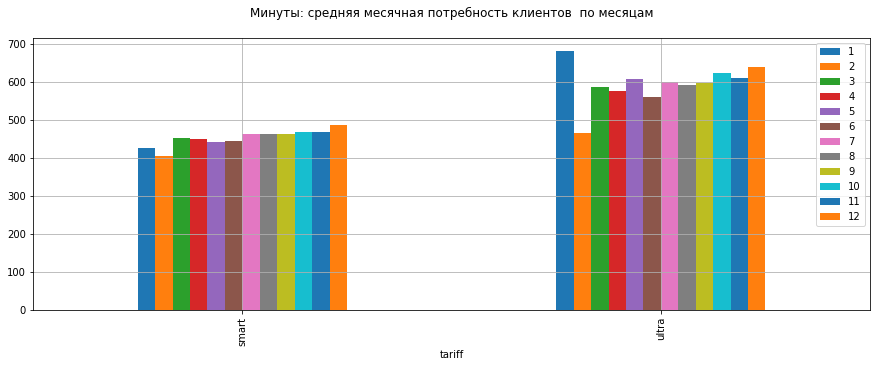

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,426,405,452,448,442,445,464,462,462,468,468,487
ultra,681,464,586,577,608,559,599,591,598,624,610,639


 
Минуты: средняя месячная потребность клиентов для тарифа smart 462
Минуты: средняя месячная потребность клиентов для тарифа ultra 601
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


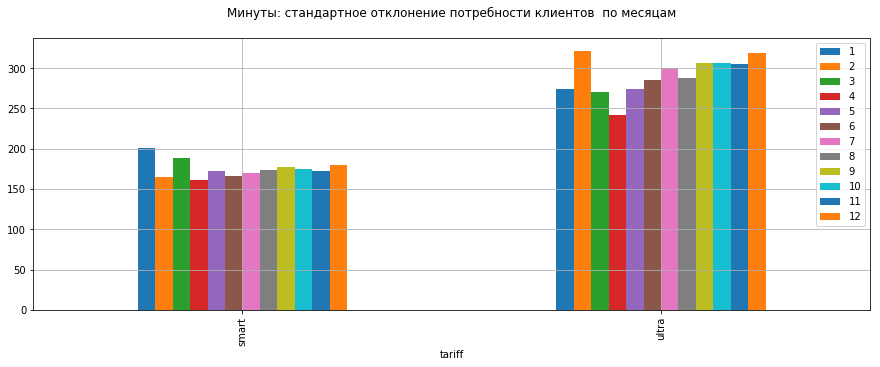

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,201,164,188,161,171,166,169,173,177,174,172,180
ultra,274,321,270,242,274,285,300,288,306,306,304,318


 
Минуты: стандартное отклонение потребности клиентов для тарифа smart 174
Минуты: стандартное отклонение потребности клиентов для тарифа ultra 297
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


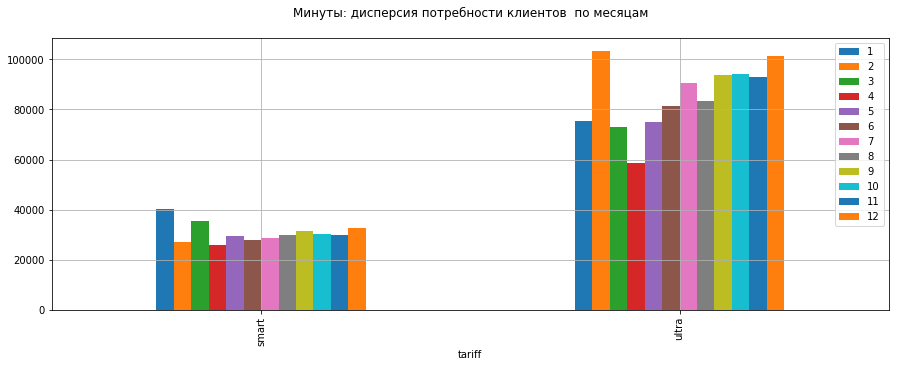

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,40434,27177,35430,26032,29573,27808,28704,30036,31648,30394,29787,32481
ultra,75356,103347,72914,58777,75135,81503,90493,83183,93765,94100,92914,101405


 
Минуты: дисперсия потребности клиентов для тарифа smart 30436
Минуты: дисперсия потребности клиентов для тарифа ultra 88202
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [50]:
service_needs(minutes_use, 'Минуты')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


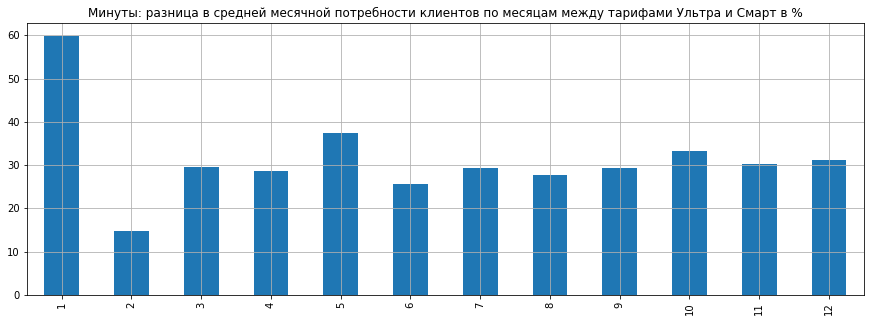

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,426,405,452,448,442,445,464,462,462,468,468,487
ultra,681,464,586,577,608,559,599,591,598,624,610,639
difference,59,14,29,28,37,25,29,27,29,33,30,31


Минуты: разница в средней месячной потребности клиентов между тарифами Ультра и Смарт 30%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [51]:
difference(minutes_use, 'Минуты')

Использование минут по месяцам для пользователей обоих тарифов:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


Минуты пользователей тарифа smart, использование по месяцам:


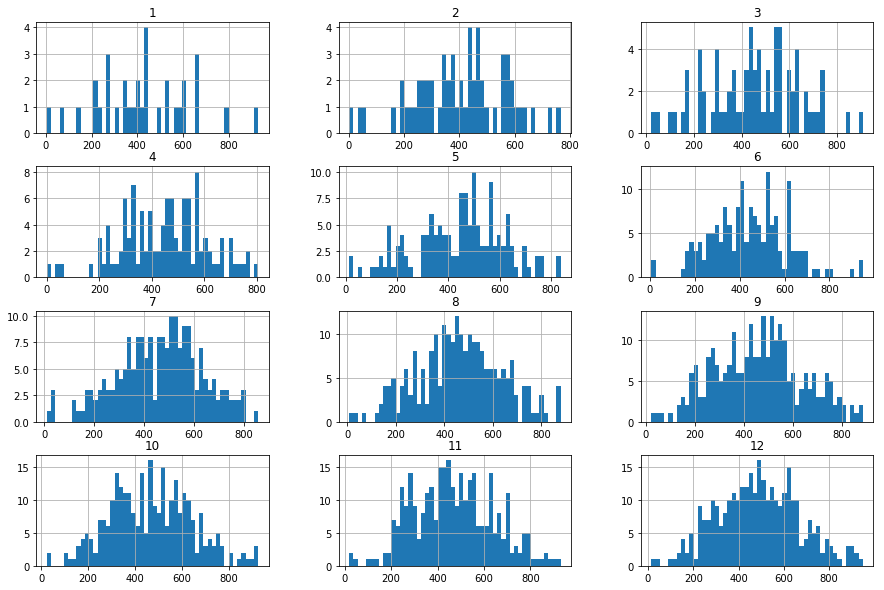

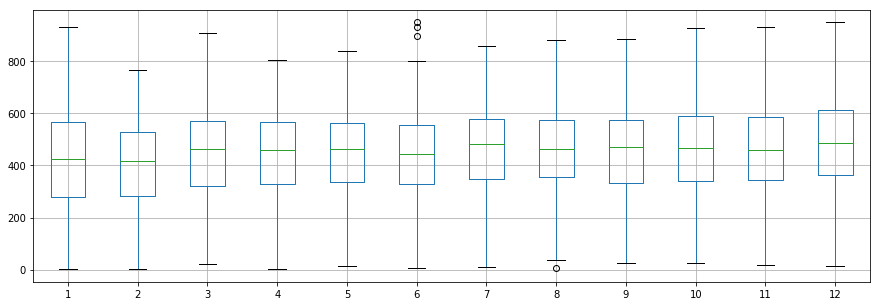

Минуты пользователей тарифа ultra, использование по месяцам:


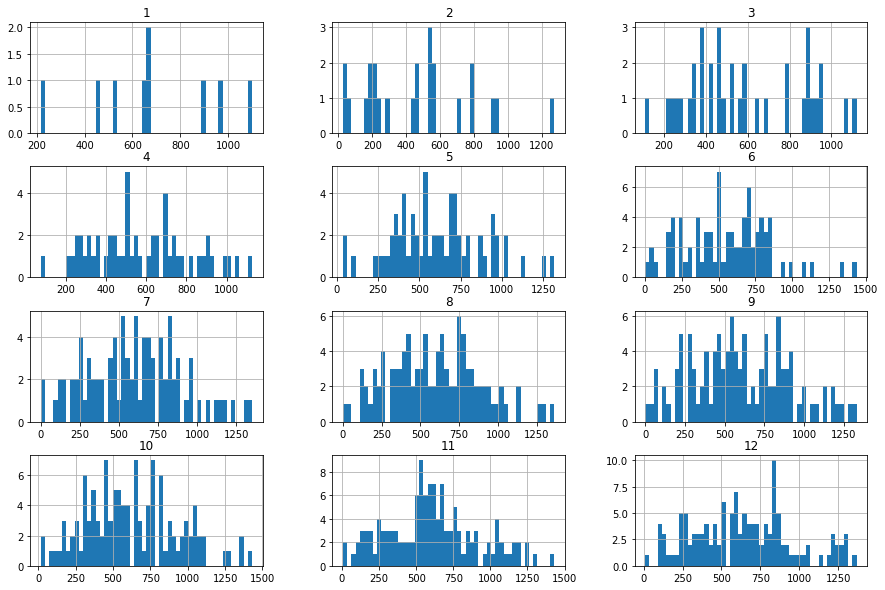

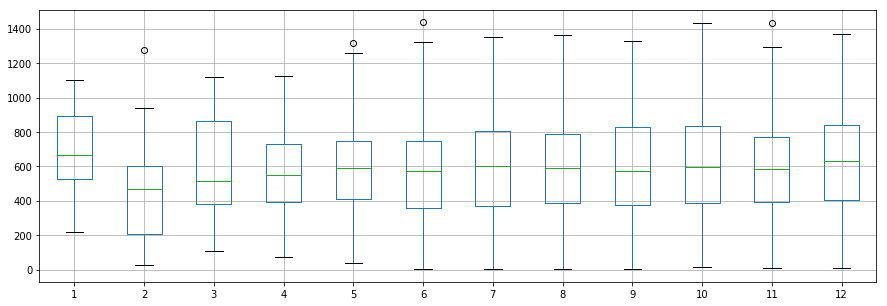

In [52]:
monthly_deviation(minutes_use, 'Минуты')

Тариф смарт: в среднем каждому пользователю требуется 462 минут в месяц, среднее стандартное отклонение 174. В течение года месячная потребность меняется от 405 минут в феврале до 487 минут в декабре.

Тариф ультра: в среднем каждому пользователю требуется 601 минут в месяц, среднее стандартное отклонение 297. В течение года месячная потребность меняется от 464 минут в феврале до 681 минут в январе.

Разница между тарифами: в среднем пользователи тарифа ультра используют на 30% больше минут, чем пользователи тарифа смарт. В течение года разница в месячной потребности меняется от 14% в феврале до 59% в январе.

В феврале заметно снижение средней потребности в минутах у пользователей тарифа ультра даже меньше предоплаченного пакета пользователей тарифа смарт. Некоторые пользователи тарифа ультра могут решить: раз они не выговаривают предоплаченные минуты даже более дешевого тарифа, то незачем им пользоваться дорогим тарифом; так они могут сменить тариф с ультры на смарт. Возможно, техническим службам стоит обратить внимание этот факт и поискать причину февральского проседания.

### Потребности в сообщениях

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


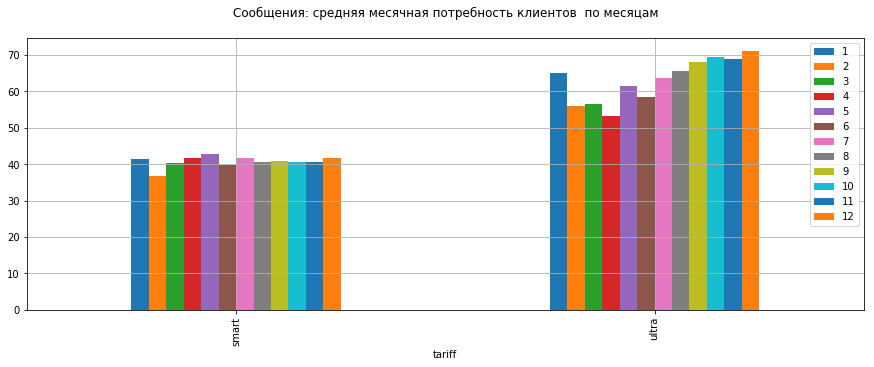

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,41,36,40,41,42,39,41,40,41,40,40,41
ultra,64,56,56,53,61,58,63,65,68,69,69,71


 
Сообщения: средняя месячная потребность клиентов для тарифа smart 41
Сообщения: средняя месячная потребность клиентов для тарифа ultra 66
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


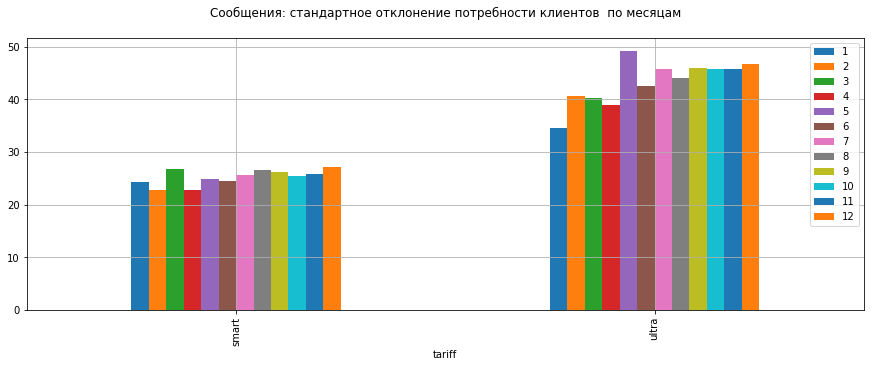

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,24,22,26,22,24,24,25,26,26,25,25,27
ultra,34,40,40,38,49,42,45,44,46,45,45,46


 
Сообщения: стандартное отклонение потребности клиентов для тарифа smart 26
Сообщения: стандартное отклонение потребности клиентов для тарифа ultra 45
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


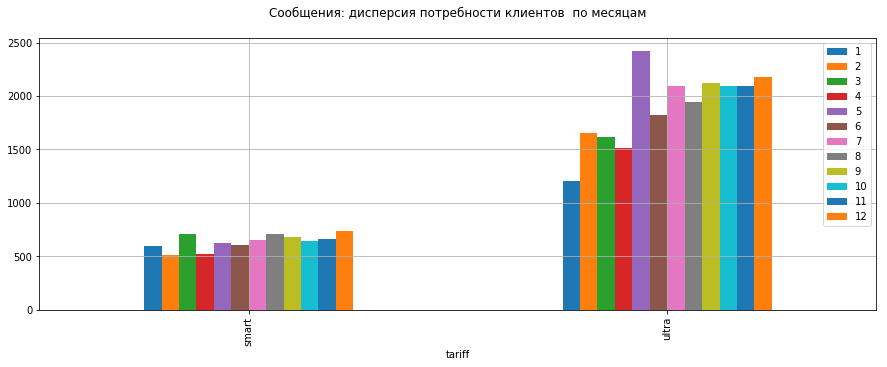

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,594,516,713,518,622,603,656,707,682,642,663,739
ultra,1200,1656,1617,1509,2421,1818,2096,1948,2118,2095,2091,2180


 
Сообщения: дисперсия потребности клиентов для тарифа smart 657
Сообщения: дисперсия потребности клиентов для тарифа ultra 2028
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [53]:
service_needs(messages_use, 'Сообщения')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


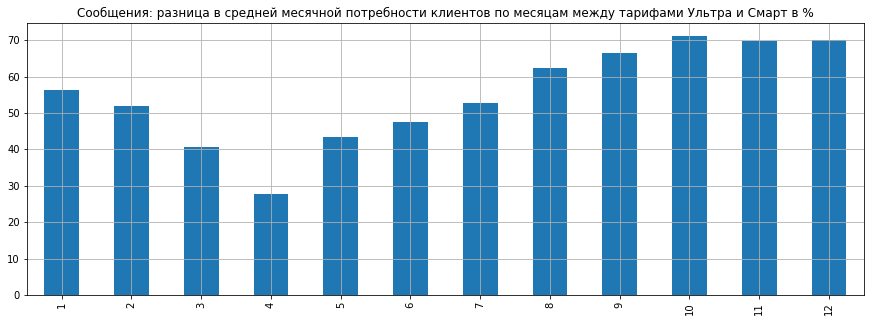

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,41,36,40,41,42,39,41,40,41,40,40,41
ultra,64,56,56,53,61,58,63,65,68,69,69,71
difference,56,51,40,27,43,47,52,62,66,71,69,69


Сообщения: разница в средней месячной потребности клиентов между тарифами Ультра и Смарт 60%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [54]:
difference(messages_use, 'Сообщения')

Использование сообщений по месяцам для пользователей обоих тарифов:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


Сообщения пользователей тарифа smart, использование по месяцам:


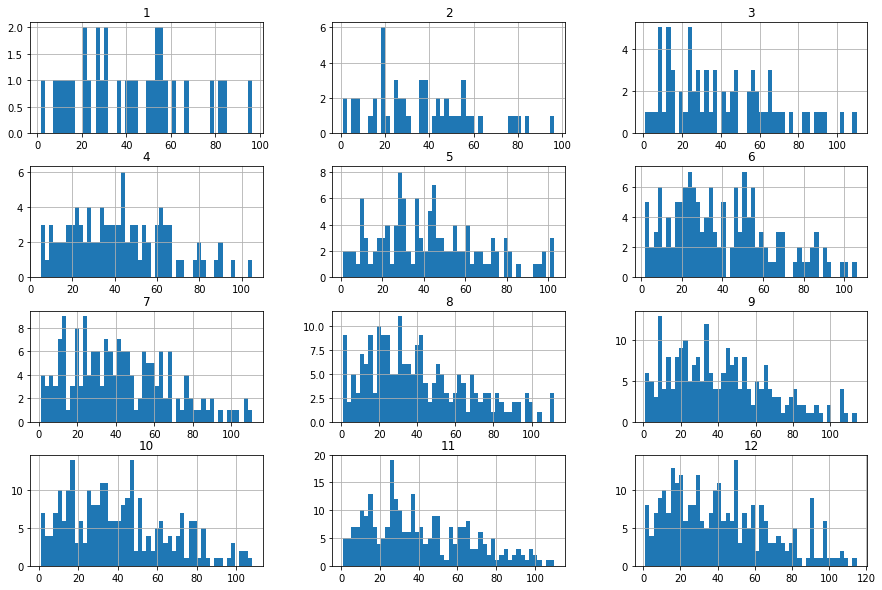

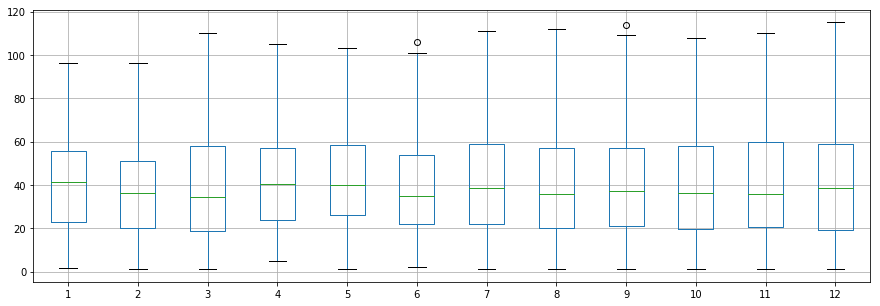

Сообщения пользователей тарифа ultra, использование по месяцам:


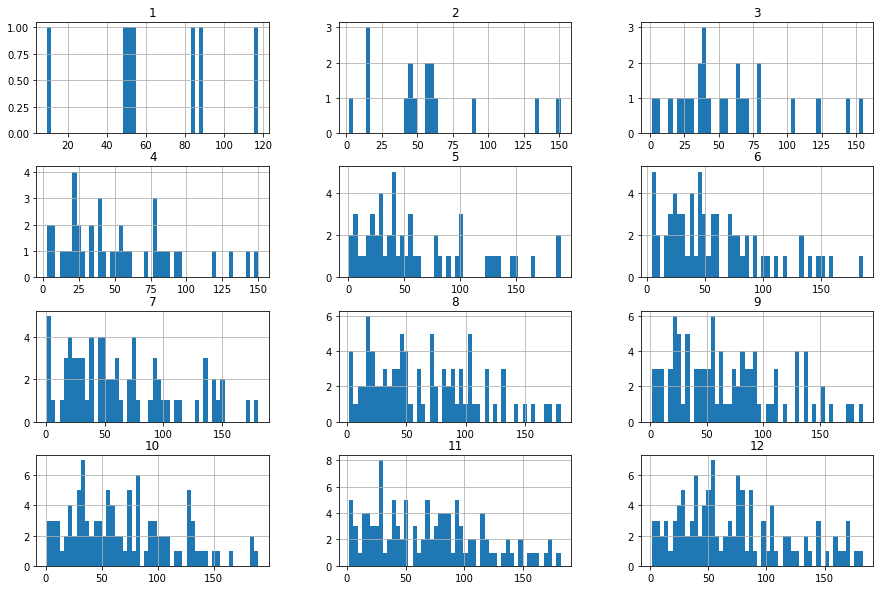

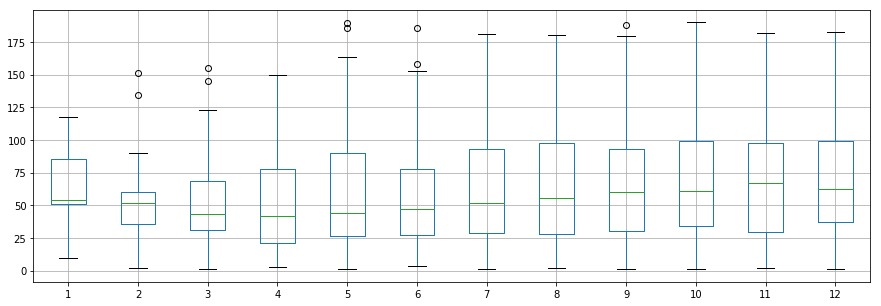

In [55]:
monthly_deviation(messages_use, 'Сообщения')

Тариф смарт: в среднем каждому пользователю требуется 41 сообщений в месяц, среднее стандартное отклонение 26. В течение года месячная потребность меняется от 36 сообщений в феврале до 42 сообщений в мае.

Тариф ультра: в среднем каждому пользователю требуется 66 сообщений в месяц, среднее стандартное отклонение 45. В течение года месячная потребность меняется от 53 сообщений в апреле до 71 сообщений в декабре.

Разница между тарифами: в среднем пользователи тарифа ультра используют на 60% больше сообщений, чем пользователи тарифа смарт. В течение года разница в месячной потребности меняется от 27% в апрелее до 71% в октябре.

### Потребности в интернете

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


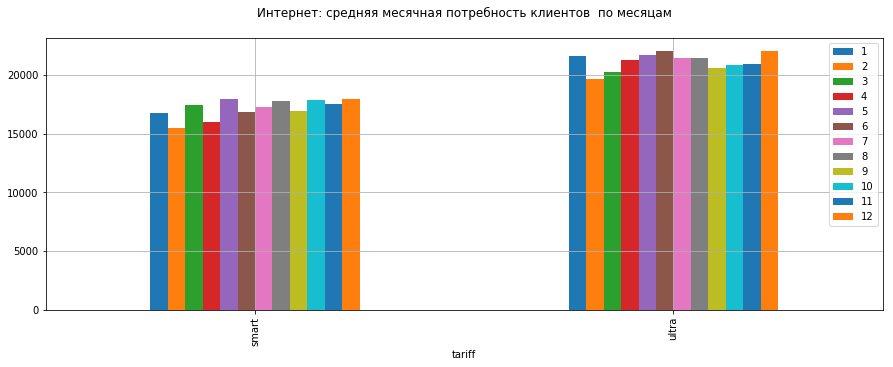

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,16744,15461,17491,16005,17959,16843,17284,17758,16967,17901,17549,17971
ultra,21619,19702,20300,21289,21691,22060,21444,21430,20587,20862,20938,22025


 
Интернет: средняя месячная потребность клиентов для тарифа smart 17415
Интернет: средняя месячная потребность клиентов для тарифа ultra 21259
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


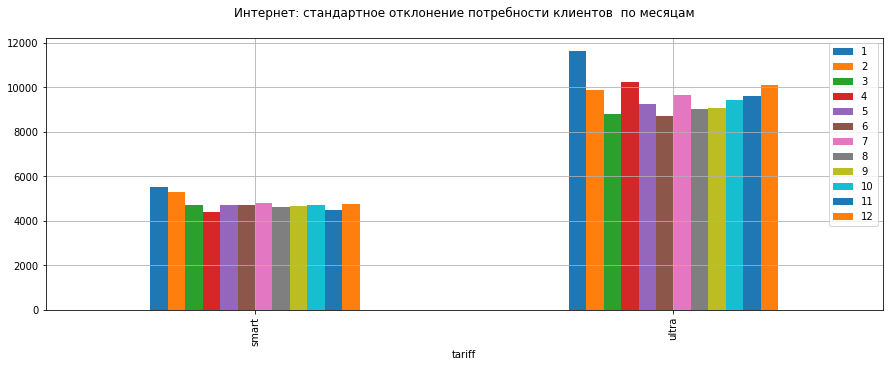

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,5511,5283,4735,4415,4710,4715,4813,4622,4646,4735,4488,4761
ultra,11643,9901,8787,10253,9236,8729,9678,9032,9056,9425,9620,10125


 
Интернет: стандартное отклонение потребности клиентов для тарифа smart 4724
Интернет: стандартное отклонение потребности клиентов для тарифа ultra 9436
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


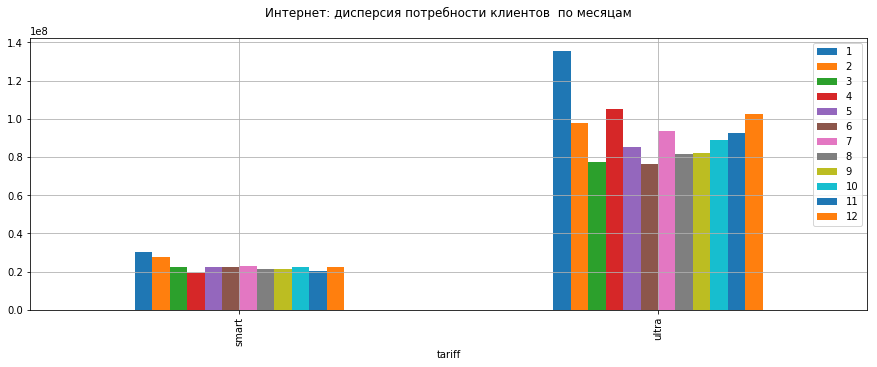

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,30373674,27912341,22424038,19492387,22186938,22234906,23174356,21369760,21590395,22425848,20143899,22674812
ultra,135568098,98043925,77221165,105124291,85308014,76197670,93664259,81584693,82026240,88848673,92558655,102522534


 
Интернет: дисперсия потребности клиентов для тарифа smart 22313438
Интернет: дисперсия потребности клиентов для тарифа ultra 89030069
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [56]:
service_needs(internet_use, 'Интернет')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


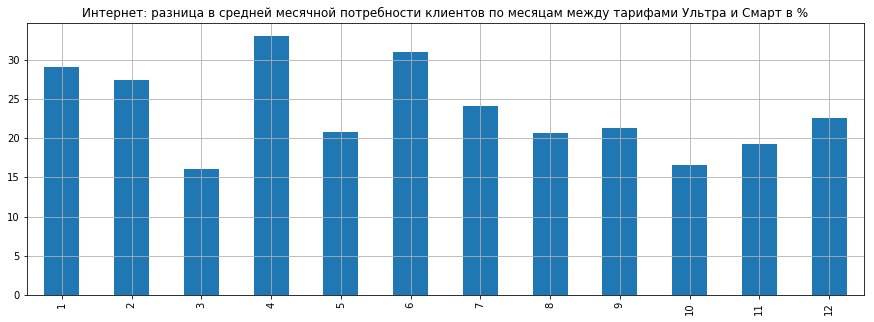

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,16744,15461,17491,16005,17959,16843,17284,17758,16967,17901,17549,17971
ultra,21619,19702,20300,21289,21691,22060,21444,21430,20587,20862,20938,22025
difference,29,27,16,33,20,30,24,20,21,16,19,22


Интернет: разница в средней месячной потребности клиентов между тарифами Ультра и Смарт 22%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [57]:
difference(internet_use, 'Интернет')

Использование интернета по месяцам для пользователей обоих тарифов:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


Интернет пользователей тарифа smart, использование по месяцам:


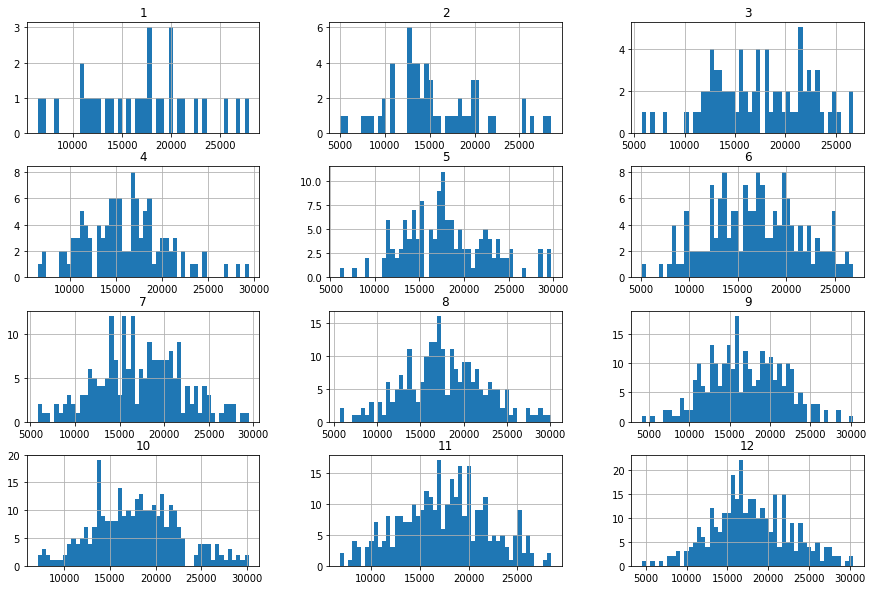

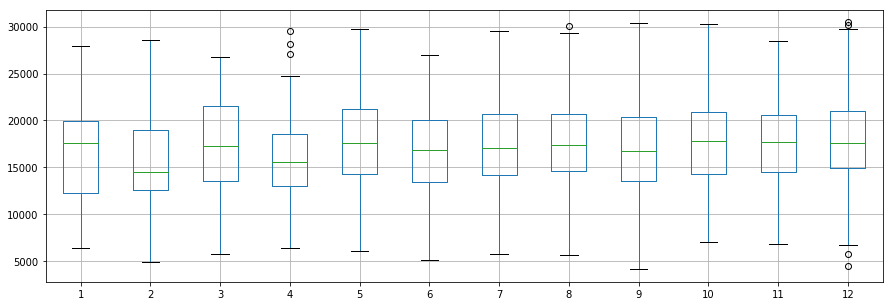

Интернет пользователей тарифа ultra, использование по месяцам:


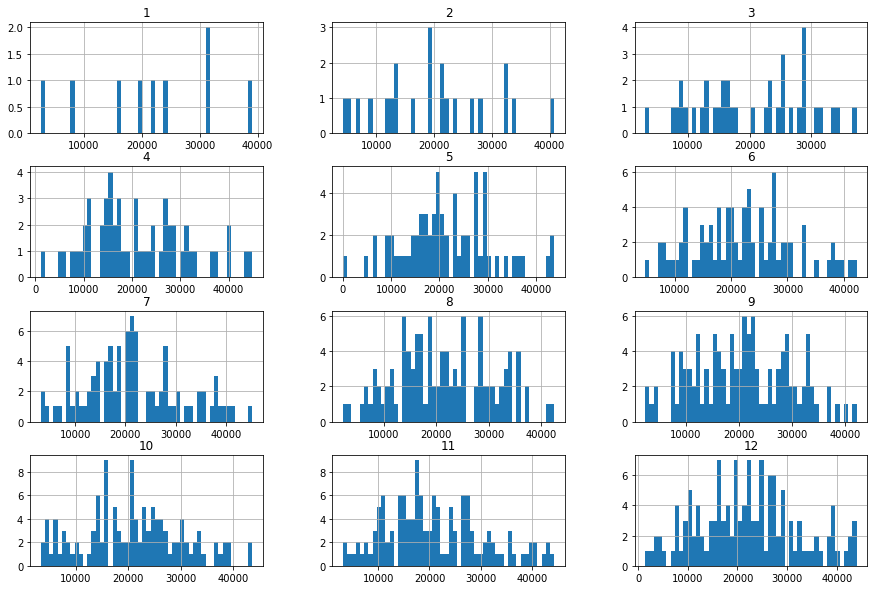

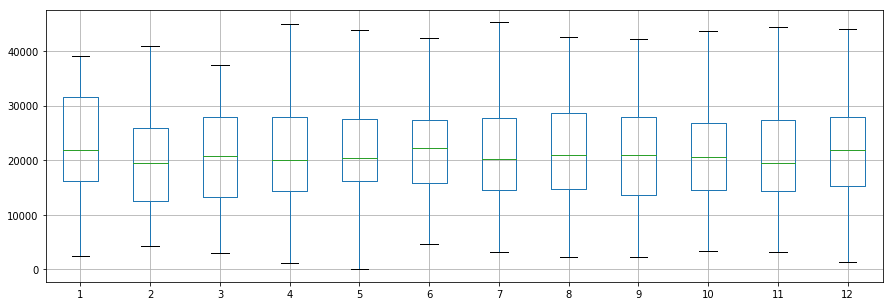

In [58]:
monthly_deviation(internet_use, 'Интернет')

Тариф смарт: в среднем каждому пользователю требуется 17415МБ интернета в месяц, среднее стандартное отклонение 4761 МБ. В течение года месячная потребность меняется от 15461МБ в феврале до 17971 МБ в декабре.

Тариф ультра: в среднем каждому пользователю требуется 21259МБ интернета в месяц, среднее стандартное отклонение 9436 МБ. В течение года месячная потребность меняется от 19702МБ в феврале до 22060МБ в июне.

Разница между тарифами: в среднем пользователи тарифа ультра используют на 22% больше трафика, чем пользователи тарифа смарт. В течение года разница в месячной потребности меняется от 16% в марте и октябре до 33% в апреле.

### Вывод

В среднем пользователи тарифа ультра используют на 30% больше минут, на 60% больше сообщений и на 22% больше трафика, чем пользователи тарифа смарт.

## Шаг 4. Проверка гипотез

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind. Параметр equal_var зададим в зависимости от степени различия дисперсии. Пороговое значение alpha выставим стандартное 0.05.

In [59]:
# функция проверки гипотез
def check_hypothesis(query_1, query_2, equal_var, null_hypothesis, alt_hypothesis):
    # создание словаря со списками платежей для каждого запроса
    check_list = {}
    table = (needs(total_fees)
     .merge(users[['user_id', 'city']], how='left', on='user_id')
     .set_index('user_id')
    )
    for query in [query_1, query_2]:
        check_list[query] = []
        (table.query(query)
         .drop(labels=table.columns.drop(range(1, 13)), axis=1)
         .applymap(lambda x: check_list[query].append(x) if x > 0 else 0)
        )
        print(f'Количество платежей в запросе ({query}): {len(check_list[query])}')
    
    alpha = 0.05
    for query in [query_1, query_2]:
        print(f'Средний платеж в запросе ({query}): {aggregation_of_all(table.query(query), np.mean):.0f}')
    results = st.ttest_ind(check_list[query_1], check_list[query_2], equal_var=equal_var)
    print(f'p-value: {results.pvalue:.2f}')
    print(f'Нулевая гипотеза - {null_hypothesis}')
    print(f'Альтернативная гипотеза - {alt_hypothesis}')
    if (results.pvalue < alpha):
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не отвергаем нулевую гипотезу')

### Проверка гипотезы "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается"

Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства. Сформулируем нулевую гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадает. Исходя из нулевой гипотезы, сформулируем альтернативную гипотезу - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Проверим дисперсию платежей каждого тарифа:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


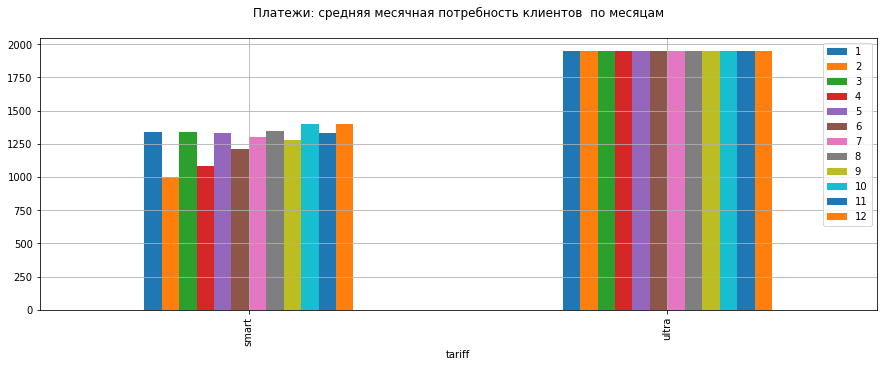

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,1337,1000,1341,1082,1330,1212,1299,1343,1275,1402,1331,1402
ultra,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950


 
Платежи: средняя месячная потребность клиентов для тарифа smart 1313
Платежи: средняя месячная потребность клиентов для тарифа ultra 1950
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


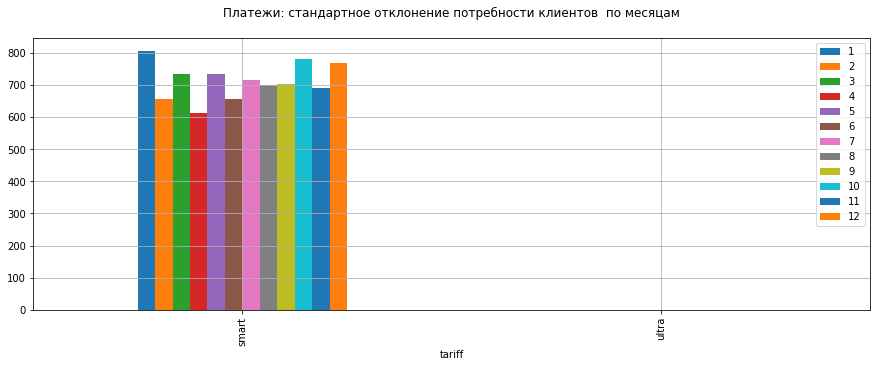

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,806.179316,656.778623,733.060018,614.301976,733.478593,656.392801,716.831299,699.333521,702.118844,780.85167,689.977296,769.837715
ultra,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


 
Платежи: стандартное отклонение потребности клиентов для тарифа smart 723
Платежи: стандартное отклонение потребности клиентов для тарифа ultra 0
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


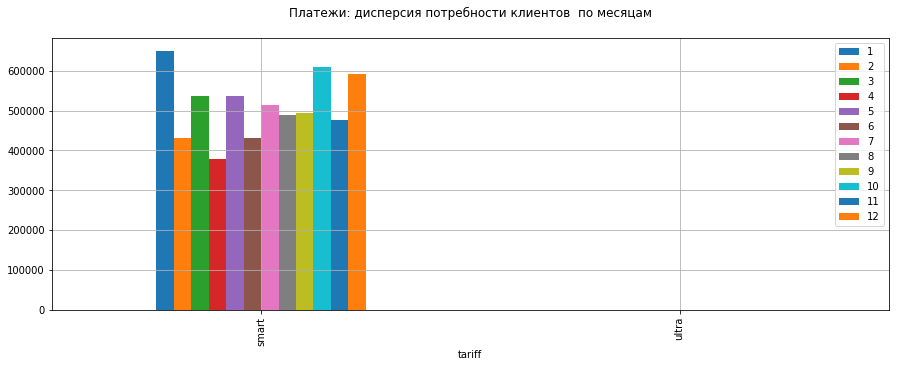

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,649925.089538,431358.159667,537376.98991,377366.917548,537990.846455,430851.509657,513847.111117,489067.373889,492970.871645,609729.330638,476068.668505,592650.107424
ultra,NaN,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


 
Платежи: дисперсия потребности клиентов для тарифа smart 522336
Платежи: дисперсия потребности клиентов для тарифа ultra 0
 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [60]:
service_needs(total_fees, 'Платежи')

Дисперсия выборки по платежам тарифа ультра отсутствует, поэтому параметр equal_var зададим False.

In [61]:
# проверка гипотезы
check_hypothesis(
    query_1 = 'tariff == "smart"',
    query_2 = 'tariff == "ultra"',
    equal_var=False,
    null_hypothesis = 'средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадает',
    alt_hypothesis = 'средняя выручка пользователей тарифов «Ультра» и «Смарт» различается',
)

Количество платежей в запросе (tariff == "smart"): 2195
Количество платежей в запросе (tariff == "ultra"): 734
Средний платеж в запросе (tariff == "smart"): 1313
Средний платеж в запросе (tariff == "ultra"): 1950
p-value: 0.00
Нулевая гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» совпадает
Альтернативная гипотеза - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
Отвергаем нулевую гипотезу


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Принимаем альтернативную гипотезу, совпадающую с заданием - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Из вышеприведенного графика видно, что клиенты тарифа смарт используют услуги сверх пакета за дополнительную плату, тогда как пользователям тарифа ультра хватает предоплаченного пакета.  Больше выручки приносит тариф ультра, можно посмотреть разницу по месяцам:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


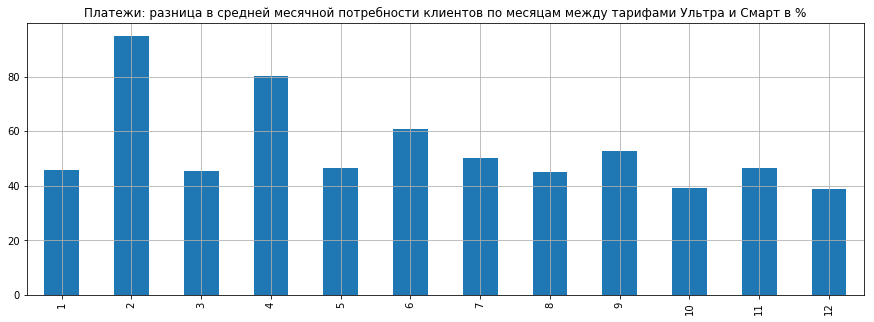

,1,2,3,4,5,6,7,8,9,10,11,12
tariff,,,,,,,,,,,,
smart,1337,1000,1341,1082,1330,1212,1299,1343,1275,1402,1331,1402
ultra,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950,1950
difference,45,94,45,80,46,60,50,45,52,39,46,38


Платежи: разница в средней месячной потребности клиентов между тарифами Ультра и Смарт 49%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [62]:
difference(total_fees, 'Платежи')

Из графика видно, что минимальная разница в ежемесячных платежах между тарифами 38 % в январе, а максимальная 94 % в феврале.

### Проверка гипотезы "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов"

Параметр equal_var зададим True, так как дисперсии выборок по платежам Москвы и регионов не должны существенно различаться, это однородные данные.

In [63]:
# проверка гипотезы
check_hypothesis(
    query_1 = 'city == "москва"',
    query_2 = 'city != "москва"',
    equal_var=True,
    null_hypothesis = 'средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов',
    alt_hypothesis = 'средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов',
)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


Количество платежей в запросе (city == "москва"): 544
Количество платежей в запросе (city != "москва"): 2385
Средний платеж в запросе (city == "москва"): 1482
Средний платеж в запросе (city != "москва"): 1472
p-value: 0.67
Нулевая гипотеза - средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов
Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Не отвергаем нулевую гипотезу


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


Но если дисперсии выборок по платежам Москвы и регионов существенно различаются, параметр equal_var зададим False:

In [64]:
# проверка гипотезы
check_hypothesis(
    query_1 = 'city == "москва"',
    query_2 = 'city != "москва"',
    equal_var=False,
    null_hypothesis = 'средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов',
    alt_hypothesis = 'средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов',
)

Количество платежей в запросе (city == "москва"): 544
Количество платежей в запросе (city != "москва"): 2385
Средний платеж в запросе (city == "москва"): 1482
Средний платеж в запросе (city != "москва"): 1472
p-value: 0.66
Нулевая гипотеза - средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов
Альтернативная гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
Не отвергаем нулевую гипотезу


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


При проверке данной гипотезу параметр equal_var не имеет значения. Принимаем нулевую гипотезу, не совпадающую с заданием - средняя выручка пользователей из Москвы совпадает с выручкой пользователей из других регионов.

### Вывод

Первую гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" поддерживаем. Разница в средней месячной выручке клиентов между тарифами Ультра и Смарт составляет 49%.

Вторую гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не поддерживаем. Разница в средней месячной выручке клиентов между Москвой и регионами составляет 10 рублей.

## Шаг 4. Общий вывод

Исходные данные содержали пропуски в единственой колонке с датой прекращания действия тарифа. Название одной колонки исправлено.

Колонки с датами приведены к типу datetime, дубликаты не обнаружены, пропуски в дате отключения тарифа заполнены 31 декабря текущего года, проверена логическая связь между датами подключения и отключения, нули в длительности звонков заменены на одну минуту, нули в объеме интернета заменены на один мегабайт, текстовые данные приведены к нижнему регистру, длительность звонков округлена до минуты вверх, трафик интернета округлен до мегабайта вверх.

Для каждого клиента посчитаны ежемесячно: количество и длительность звонков, количество сообщений, объем интернет-трафика, месячная плата за услуги сверх пакета и тариф пропорционально дням использования в месяц, помесячная выручка с каждого пользователя.

#### Минуты

Тариф смарт: в среднем каждому пользователю требуется 462 минут в месяц, среднее стандартное отклонение 174. В течение года месячная потребность меняется от 405 минут в феврале до 487 минут в декабре.

Тариф ультра: в среднем каждому пользователю требуется 601 минут в месяц, среднее стандартное отклонение 297. В течение года месячная потребность меняется от 464 минут в феврале до 681 минут в январе.

Разница между тарифами: в среднем пользователи тарифа ультра используют на 30% больше минут, чем пользователи тарифа смарт. В течение года разница в месячной потребности меняется от 14% в феврале до 59% в январе.

В феврале заметно снижение средней потребности в минутах у пользователей тарифа ультра даже меньше предоплаченного пакета пользователей тарифа смарт. Некоторые пользователи тарифа ультра могут решить: раз они не выговаривают предоплаченные минуты даже более дешевого тарифа, то незачем им пользоваться дорогим тарифом; так они могут сменить тариф с ультры на смарт. Возможно, техническим службам стоит обратить внимание этот факт и поискать причину февральского проседания.

#### Сообщения

Тариф смарт: в среднем каждому пользователю требуется 41 сообщений в месяц, среднее стандартное отклонение 26. В течение года месячная потребность меняется от 36 сообщений в феврале до 42 сообщений в мае.

Тариф ультра: в среднем каждому пользователю требуется 66 сообщений в месяц, среднее стандартное отклонение 45. В течение года месячная потребность меняется от 53 сообщений в апреле до 71 сообщений в декабре.

Разница между тарифами: в среднем пользователи тарифа ультра используют на 60% больше сообщений, чем пользователи тарифа смарт. В течение года разница в месячной потребности меняется от 27% в апрелее до 71% в октябре.

#### Интернет

Тариф смарт: в среднем каждому пользователю требуется 17415МБ интернета в месяц, среднее стандартное отклонение 4761 МБ. В течение года месячная потребность меняется от 15461МБ в феврале до 17971 МБ в декабре.

Тариф ультра: в среднем каждому пользователю требуется 21259МБ интернета в месяц, среднее стандартное отклонение 9436 МБ. В течение года месячная потребность меняется от 19702МБ в феврале до 22060МБ в июне.

Разница между тарифами: в среднем пользователи тарифа ультра используют на 22% больше трафика, чем пользователи тарифа смарт. В течение года разница в месячной потребности меняется от 16% в марте и октябре до 33% в апреле.

#### Гипотезы

Первую гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается" поддерживаем. Разница в средней месячной выручке клиентов между тарифами Ультра и Смарт составляет 49%.

Вторую гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов" не поддерживаем. Разница в средней месячной выручке клиентов между Москвой и регионами составляет 10 рублей.